In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (15, 10)


## Новых случаев

In [2]:
new_case = pd.read_csv('data_new.csv', sep=';', parse_dates=['Дата'], index_col='Дата')
new_case.columns = new_case.columns.str.strip()

In [3]:
#Последние 20 дней
new_case.last('20D')

,СПб,Лен. обл.,Москва,Моск. обл
Дата,,,,
2020-03-06,0,0,5,0
2020-03-07,1,0,0,0
2020-03-08,0,0,0,1
2020-03-09,0,0,3,0
2020-03-10,0,0,0,0
2020-03-11,0,0,6,2
2020-03-12,0,0,4,0
2020-03-13,3,1,5,1
2020-03-14,1,0,9,1


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff8caae39b0>,
      dtype=object)

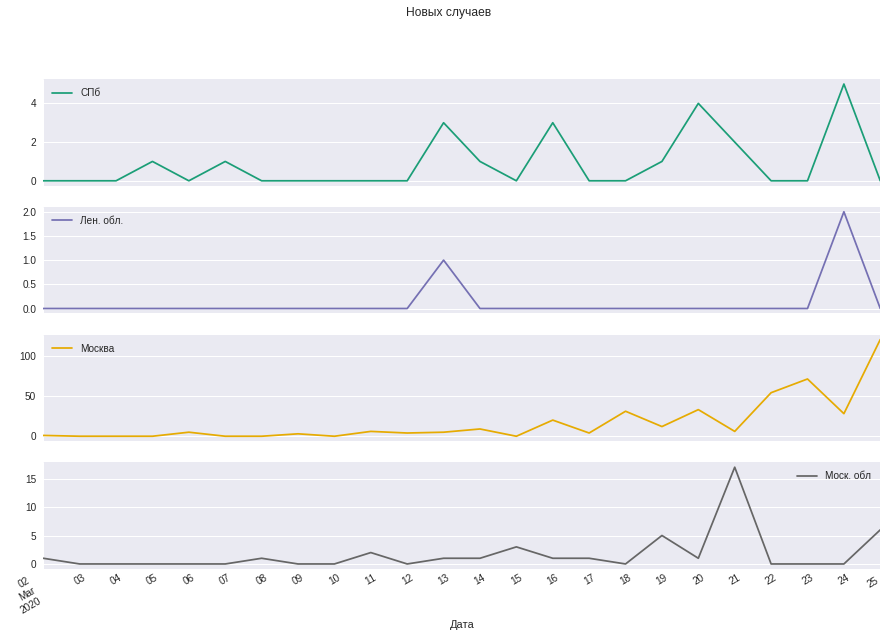

In [4]:
new_case.plot(subplots = True, title = "Новых случаев", colormap='Dark2')

In [5]:
new_case.keys()

Index(['СПб', 'Лен. обл.', 'Москва', 'Моск. обл'], dtype='object')

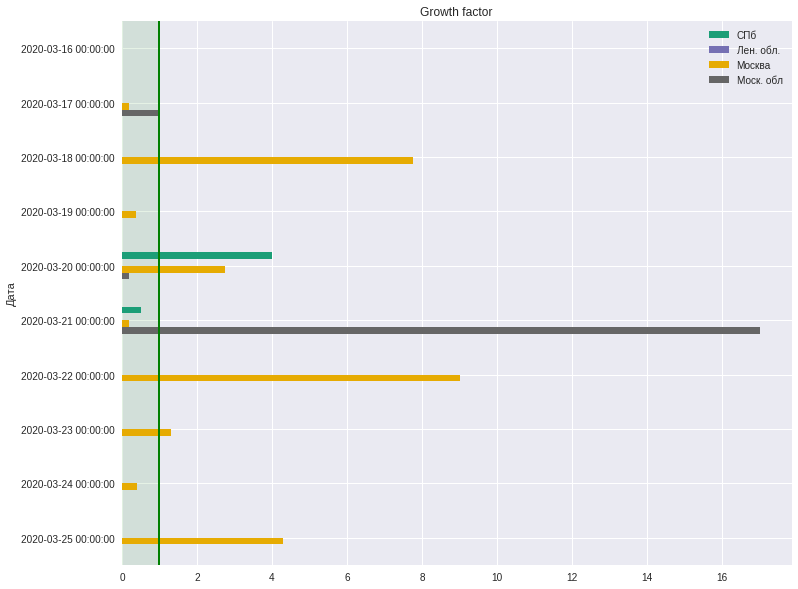

In [16]:
#Growth factor for last ten days

dates = new_case.index[-10 :]

gf_all = pd.DataFrame(index = dates)

for city in new_case.keys():   
    gf = []
    gf.append(None) # для первой даты

    #для каждой даты
    for row in range(new_case.index.size - 10 + 1, new_case.index.size, 1):
        if (0 == new_case[city].values[row - 1]):
            gf.append(None)
        else:
            gf.append(new_case[city].values[row] / new_case[city].values[row - 1])
    #print(new_case[city].values[row], new_case[city].values[row - 1], gf)
    gf_all[city] = gf
    
gf_all


x = np.array([0, 1])
gf_all.plot.barh(subplots = False, title = "Growth factor", figsize=(12,10), colormap='Dark2') 
plt.axvline(x=1, lw=2, color='green')
plt.fill_between(x, -1, dates.size + 1, color='green', alpha=0.1)
plt.gca().invert_yaxis()


## Всего случаев

In [7]:
total = new_case.copy()
#print(total.index.size)
for row in range(1, total.index.size, 1):
    total[:].values[row] = total[:].values[row] + total[:].values[row-1]

total.to_csv("data_total.csv",  sep=';')


In [8]:
#total = pd.read_csv('data_total.csv', sep=';', parse_dates=['Дата'], index_col='Дата')
#total.columns = total.columns.str.strip()

#Последние 10 дней
total.last('10D')

,СПб,Лен. обл.,Москва,Моск. обл
Дата,,,,
2020-03-16,9,1,53,10
2020-03-17,9,1,57,11
2020-03-18,9,1,88,11
2020-03-19,10,1,100,16
2020-03-20,14,1,133,17
2020-03-21,16,1,139,34
2020-03-22,16,1,193,34
2020-03-23,16,1,264,34
2020-03-24,21,3,292,34


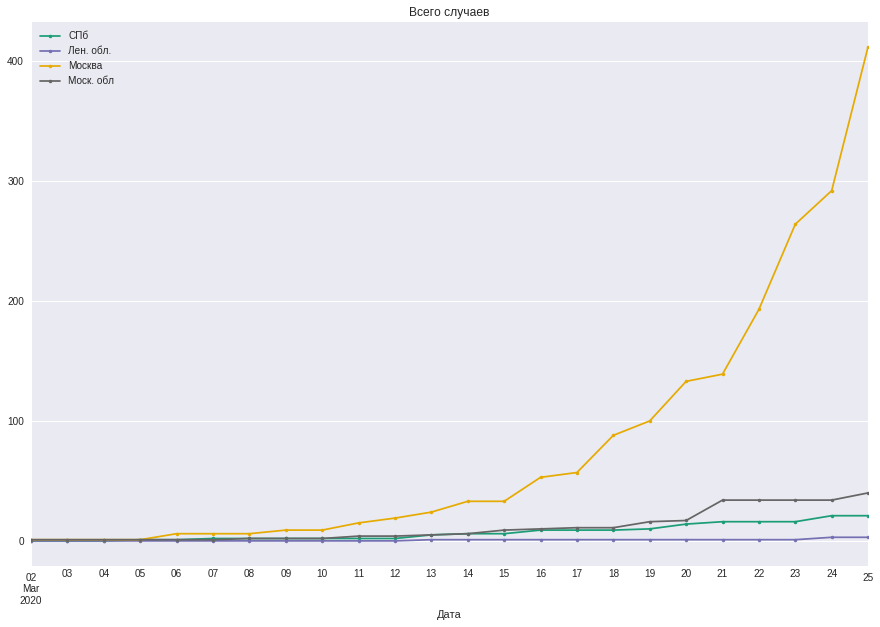

In [9]:
total.plot(style='.-', title = "Всего случаев", colormap='Dark2')

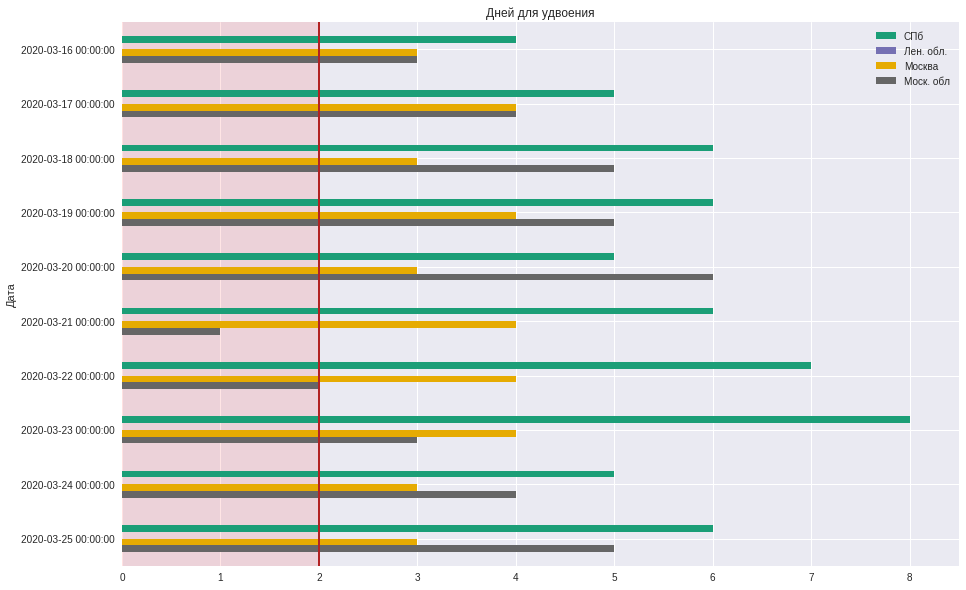

In [10]:
#Число дней, понадобившихся для удвоения (за последние 10 дней)

dates = total.index[-10 :]

rate_all = pd.DataFrame(index = dates)

for city in total.keys():   
    rate = [] #дней для удвоения
    
    #для каждой даты
    for cur_row in range(1, total.index.size, 1):
        half = int(total[city].values[cur_row] / 2)    
        if (half < 2): #при малом числе случаев, как-то бессмысленно оценивать скорость
            rate.append(-1)
            continue        
    
        #назад по списку, пока не найдём значение в два раза меньшее, чем на текущую дату
        for prev in range(cur_row - 1, -1, -1):        
            #print(prev, half, total['СПб'].values[row])               
            if half >= total[city].values[prev]:
                diff = total[city].index[cur_row] - total[city].index[prev]
                rate.append(diff.days)
                break
                
    rate_all[city] = rate[-10 : ]

rate_all


x = np.array([0, 1, 2])
rate_all.plot.barh(subplots = False, title = "Дней для удвоения", colormap='Dark2', xlim = (0, rate_all.max().max() + 0.5)) 
plt.fill_between(x, -1, dates.size + 1,  color='red', alpha=0.1)
plt.axvline(x=2, lw=2, color='firebrick')
plt.gca().invert_yaxis()

In [11]:
# -1 - маленькое число случаев, расчёт не производился
rate_all

,СПб,Лен. обл.,Москва,Моск. обл
Дата,,,,
2020-03-16,4,-1,3,3
2020-03-17,5,-1,4,4
2020-03-18,6,-1,3,5
2020-03-19,6,-1,4,5
2020-03-20,5,-1,3,6
2020-03-21,6,-1,4,1
2020-03-22,7,-1,4,2
2020-03-23,8,-1,4,3
2020-03-24,5,-1,3,4


## Страна

In [12]:
country = pd.read_csv('data_country.csv', sep=';', parse_dates=['Дата'], index_col='Дата')
country.columns = country.columns.str.strip()

In [13]:
print(country.keys())

#Последние 10 дней
country.last('10D')

Index(['Зарегистрированных', 'Выписанных', 'Умерших', 'Под контролем',
       'Всего зарег.'],
      dtype='object')


,Зарегистрированных,Выписанных,Умерших,Под контролем,Всего зарег.
Дата,,,,,
2020-03-16,30,1,0,NaN,93
2020-03-17,21,3,0,16401.0,114
2020-03-18,33,5,0,17904.0,147
2020-03-19,52,5,0,22178.0,199
2020-03-20,54,12,0,27487.0,253
2020-03-21,53,16,0,36540.0,306
2020-03-22,61,16,0,52747.0,367
2020-03-23,71,17,0,NaN,438
2020-03-24,57,22,0,NaN,495


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff8c65b72e8>,
      dtype=object)

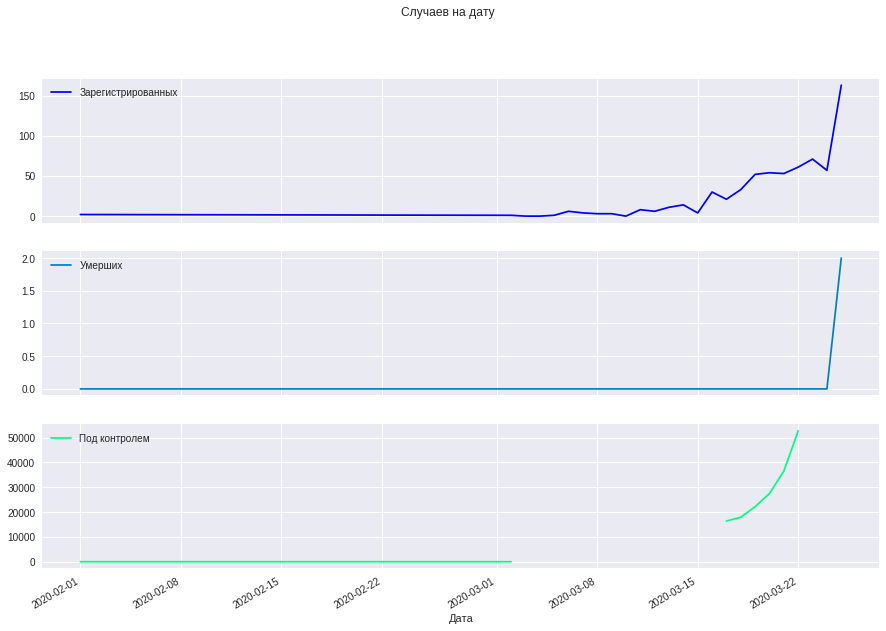

In [14]:
country[['Зарегистрированных',  'Умерших', 'Под контролем']].plot(subplots = True, title = "Случаев на дату", colormap='winter', figsize=(15,10))

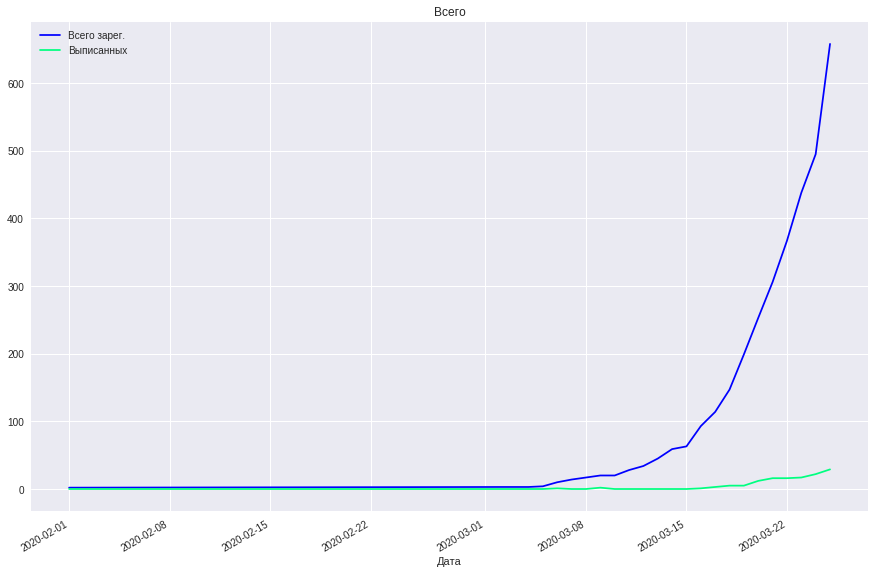

In [15]:
country[['Всего зарег.', 'Выписанных']].plot(subplots = False, title = "Всего", colormap='winter')